## Investigation Overview

This presentation focuses on select features of interest to me in the Prosper loan dataset, particularly reationships between these features and how they correlate. Features of interest to me in this dataset can largely be said to fall under two categories; the borrowers information, like borrower's employment status, monthly income and others. Then the loan information like loan original amount, terms, etc. these are explored using visualizations to highlight key trends and insights.

## Dataset Overview

This analysis explores a dataset that contains loan information of 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. For the purpose of this analysis I trimmed down the original dataset provided by udacity to few variables of interest for my analysis, this reduced the dataset features from  81 to 26. 


# Part II - Prosper Loan Data Exploration 

## by Gideon Ithenumah

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('prosperLoanData.csv')

In [4]:
# Create new dataframe with columns of interest
loan_df_sub = loan_df.loc[:,('ListingKey', 'ListingCreationDate', 'MemberKey', 'BorrowerState', 'EmploymentStatus', 'Occupation', 'BorrowerAPR', 'ClosedDate', 'BorrowerRate', 'IsBorrowerHomeowner', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'LoanStatus', 'LoanKey', 'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter', 'Term', 'MonthlyLoanPayment', 'ProsperScore', 'ProsperRating (Alpha)', 'ListingCategory (numeric)')]


In [5]:
#Rename columns
loan_df_sub = loan_df_sub.rename(columns={'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'})

# Fix Datatype issues

loan_df_sub.ListingCreationDate = pd.to_datetime(loan_df_sub.ListingCreationDate) 
loan_df_sub.ClosedDate = pd.to_datetime(loan_df_sub.ClosedDate)
loan_df_sub.LoanOriginationDate = pd.to_datetime(loan_df_sub.LoanOriginationDate)
loan_df_sub.Occupation = loan_df_sub.Occupation.astype('category')
loan_df_sub.BorrowerState = loan_df_sub.BorrowerState.astype('category')
loan_df_sub.LoanStatus = loan_df_sub.LoanStatus.astype('category')
loan_df_sub.ListingCategory = loan_df_sub.ListingCategory.astype('category')
loan_df_sub.EmploymentStatus = loan_df_sub.EmploymentStatus.astype('category')

# Convert ProsperRating & IncomeRange to ordinal categorical 
ordinal_dict = {'ProsperRating': ['N/A','HR','E','D','C', 'B', 'A', 'AA'], 'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for var in ordinal_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_dict[var])
    loan_df_sub[var] = loan_df_sub[var].astype(ordered_var)

#Replace listing category number by name
List_cat_new = {0:  'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan',\
                5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure',\
                11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases',\
                15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

loan_df_sub['ListingCategory'] = loan_df_sub['ListingCategory'].map(List_cat_new)


#### Borrower's Emplyment Status  
Most loans are given to employed individuals with a total of 59%, which is higher than other categories put together. This makes sense because they stand a better chance of repayment.

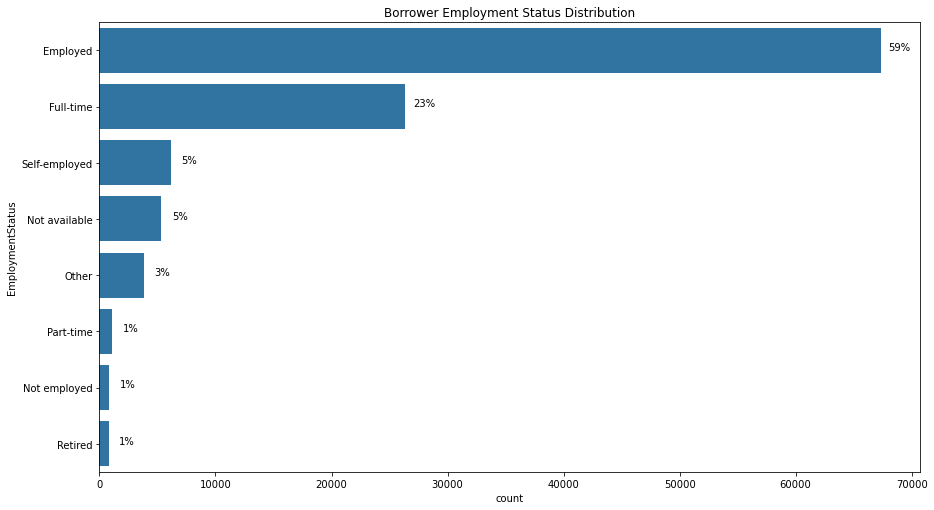

In [14]:
#Borrower Employment Status Distrobution
cat_order = loan_df_sub.EmploymentStatus.value_counts().index
plt.figure(figsize= [14.70, 8.27])
base_color = sb.color_palette()[0]

sb.countplot(data=loan_df_sub, y='EmploymentStatus', color=base_color, order=cat_order);
plt.title('Borrower Employment Status Distribution')

# add annotations
n_points = loan_df_sub.shape[0]
cat_counts = loan_df_sub['EmploymentStatus'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(count+1600, loc,  pct_string, ha = 'center', color = 'black');

#### Borrower's Occupation  
Asides the borrowers whose occupation was not specified, it is seen that Professionals take the most loans.

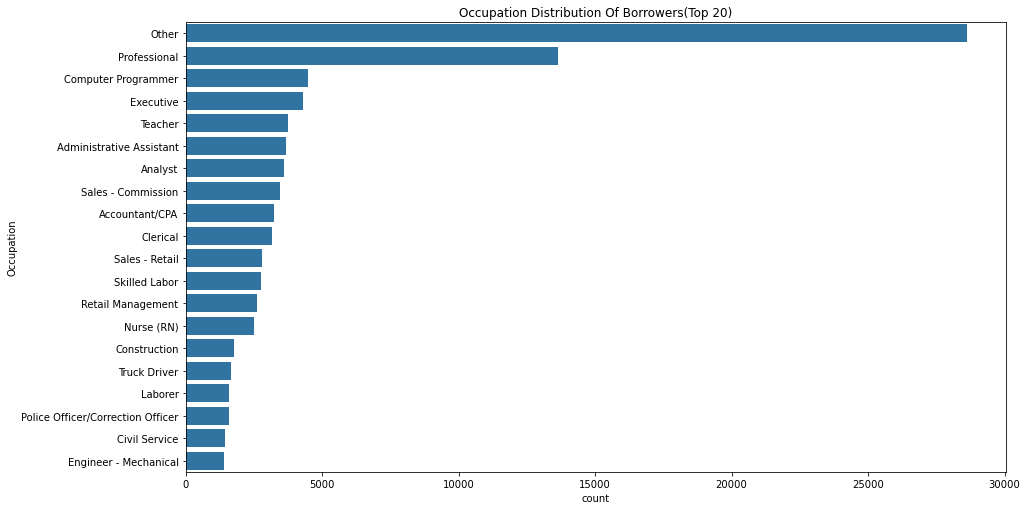

In [15]:
# Borrower Occupation Distribution of top 20 Occupation

cat_order = loan_df_sub.Occupation.value_counts().iloc[:20].index
plt.figure(figsize=[14.70, 8.27])
sb.countplot(data=loan_df_sub, y= 'Occupation', color=base_color, order=cat_order);
plt.title('Occupation Distribution Of Borrowers(Top 20)');

#### Distribution Of Income Range  
People with yearly income range between 25,000 and 49,999 dollars take out loans the most.

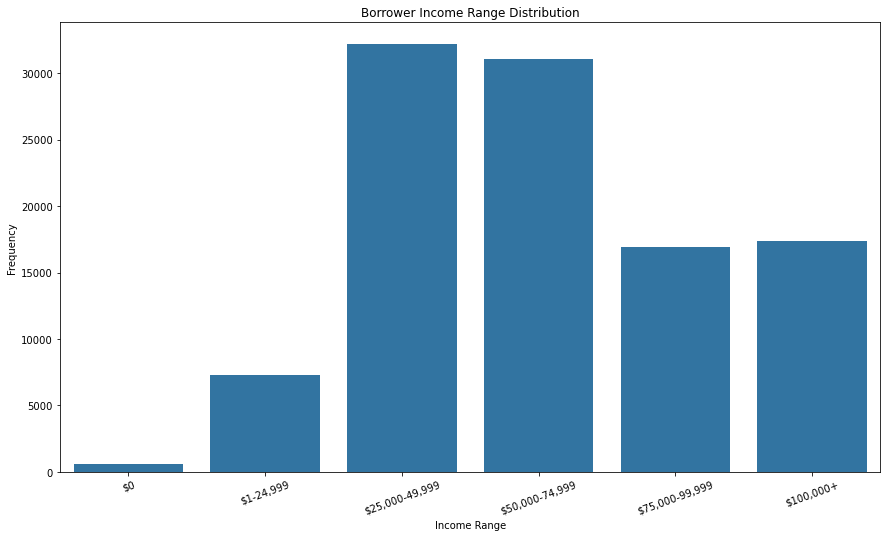

In [16]:
#Borrower Income Range Status Distrobution
plt.figure(figsize=[14.70, 8.27])
sb.countplot(data=loan_df_sub, x='IncomeRange', color=base_color);
plt.title('Borrower Income Range Distribution')
plt.xticks(rotation=20)
plt.xlabel("Income Range")
plt.ylabel("Frequency");

#### Stated Monthly Income  
From the visualization it is seen that most of the borrower's monthly income is around 3,000 to 5,000 dollars.

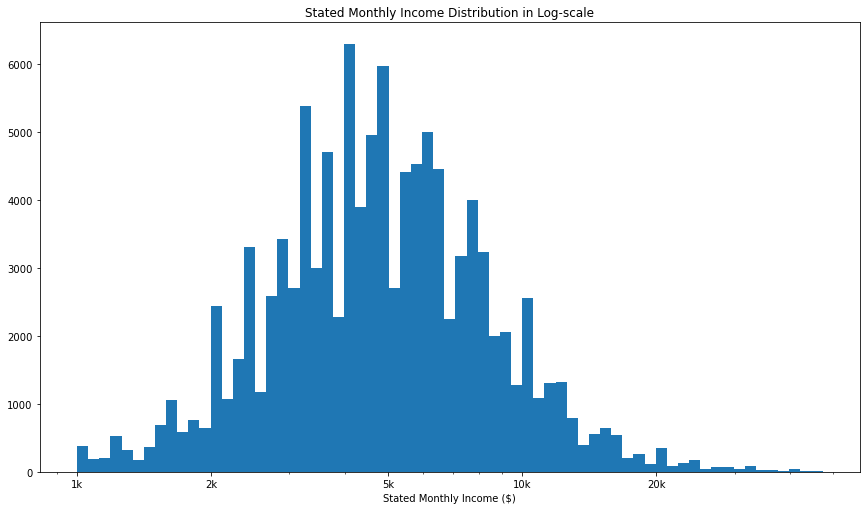

In [17]:
# Histogram to show the distribution of the Borrower's Stated Monthly Income
plt.figure(figsize = [14.70, 8.27])

log_binsize = 0.025
bins = 10 ** np.arange(3, 4.7, log_binsize)
plt.hist(data = loan_df_sub, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4], ['1k', '2k','5k', '10k', '20k'])
plt.xlabel('Stated Monthly Income ($)')
plt.title('Stated Monthly Income Distribution in Log-scale');

#### Loan Origianal Amount Vs Monthly Loan Payment  
Relationship between these two features show that the higher the loan taken the higher the momthly payment required.

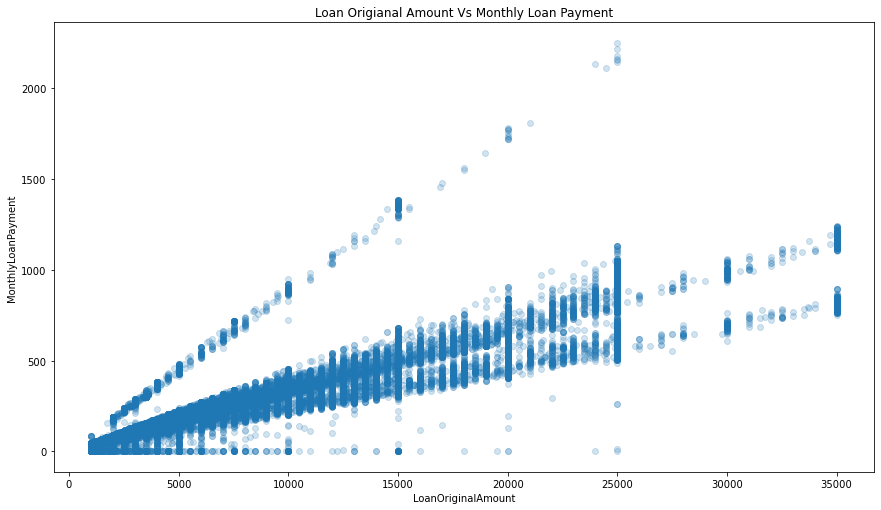

In [18]:
plt.figure(figsize=([14.70, 8.27]))
plt.scatter(data=loan_df_sub, x='LoanOriginalAmount', y='MonthlyLoanPayment', alpha=1/5)
plt.title('Loan Origianal Amount Vs Monthly Loan Payment')
plt.ylabel('MonthlyLoanPayment')
plt.xlabel('LoanOriginalAmount');

#### Loan Orignal Amount Vs Employment Status 
Analysis of these two features show that employed borrowers are entitled to larger loan sums.

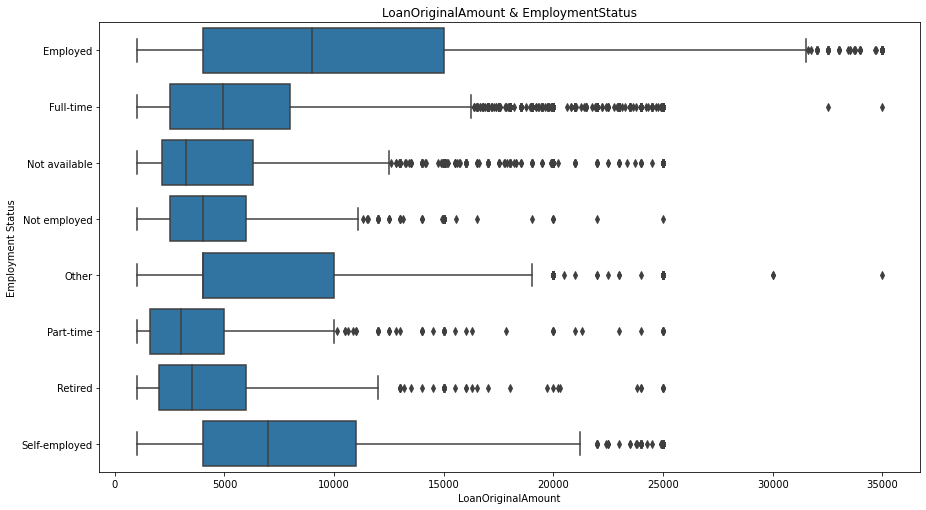

In [19]:
plt.figure(figsize = [14.70, 8.27])
sb.boxplot(data=loan_df_sub,x='LoanOriginalAmount',y='EmploymentStatus',color=base_color);
plt.xlabel('LoanOriginalAmount');
plt.ylabel('Employment Status');
plt.title('LoanOriginalAmount & EmploymentStatus');

#### LoanStatus Vs BorrowerAPR By EmploymentStatus  
Further investigations shows that for each category of loan status, the lowest APR is for Employed and borrowers with Full-time jobs. Whereas highest APR is for unemployed borrowers. Most of the high BorrowerAPR are on the chargeoff, completed and current loans. Some outliers in chargeoff and defaulted loan status are noticed, and more in-depth analysis will be needed to understand why.

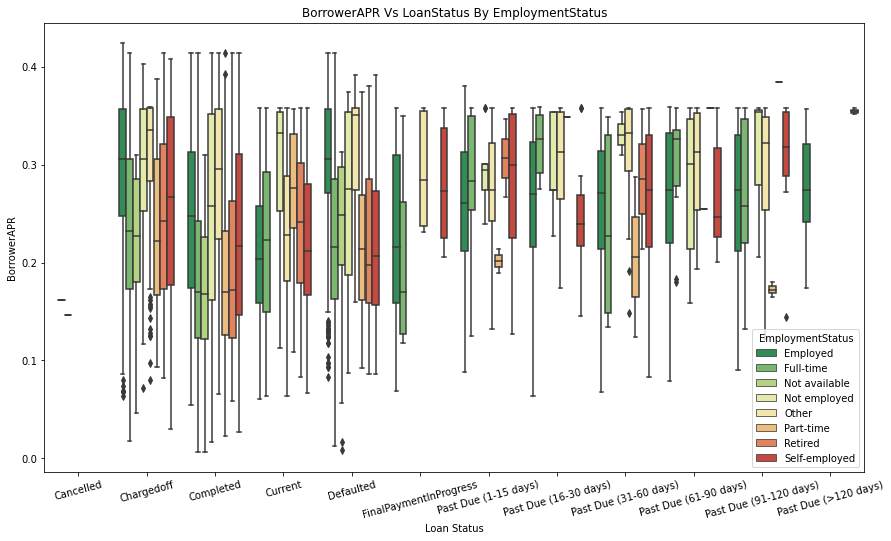

In [21]:
# LoanStatus Vs BorrowerAPR By EmploymentStatus
plt.figure(figsize=[14.70, 8.27])
sb.boxplot(x="LoanStatus", y="BorrowerAPR", hue="EmploymentStatus", data= loan_df_sub, palette="RdYlGn_r");
plt.title('BorrowerAPR Vs LoanStatus By EmploymentStatus');
plt.xlabel('Loan Status');
plt.ylabel('BorrowerAPR');
plt.xticks(rotation = 15);

In [22]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 883205 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
^C

Interrupted
